# Task 6 : Evaluate the effectiveness of attack detection (multi-class).
Experimental results download link: https://huggingface.co/datasets/JimXie/IIoTset/resolve/main/performance.tar.gz

In [2]:
import os,json,sys,logging
sys.path.append("./share")
sys.path.append("./common")
import pandas as pd
import json
from tqdm.notebook import tqdm
from SHSample import CSHSample
from SHDataProcess import CSHDataProcess
from SHFeatureSelect import CSHFeature
from SHDataEDA import CSHDataDistribution,CSHDataTest
from SHEvaluation import CSHEvaluate
from IoTMLEvaluate import CIoTAttack
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Config import g_data_root
from datetime import datetime
warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 500)
g_token_root = "%stoken/"%g_data_root
g_feature_root = "%s/features"%g_data_root
g_result_root = "%sresult"%g_data_root

In [11]:
def show_bar(df_tmp,col_y = 'model'):
    fig, axes = plt.subplots(1, 1, figsize=(9, 4))
    sns.barplot(x='accuracy', y=col_y,hue='kind',orient='h',ci=None,data=df_tmp,ax=axes)
    axes.set_title("Accuracy")
    axes.set_xlabel('Accuracy', fontsize=10)
    axes.set_ylabel('Attack', fontsize=10)
    axes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    #axes.set_xticklabels(axes.get_xticklabels(), rotation=20)
    plt.tight_layout()
    plt.show()
    
def show_line(df_tmp):
    fig, axes = plt.subplots(1, 1, figsize=(9, 4))
    sns.lineplot(x='ratio', y='accuracy',hue='kind',ci=None,data=df_tmp,ax=axes)
    axes.set_title("Accuracy")
    axes.set_xlabel('Noise ratio', fontsize=10)
    axes.set_ylabel('Accuracy', fontsize=10)
    axes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    plt.tight_layout()
    plt.show()

# Load experimental data.

In [5]:
df_score = pd.read_csv("./IIoTSet/result/attack-spectrums.csv")
df_distance = pd.read_csv("./IIoTSet/result/distance.csv",index_col=0)

# Use Cosine distance to measure similarity.

In [6]:
df_attack = CIoTAttack(df_score).get_attack(df_distance,"Cosine")
df_result = CIoTAttack(df_score).get_accuracy(df_attack)
if 'score' in df_result['kind']:
    df_result['kind']=df_result['kind'].map({"score":"SSPE","sum":"COAP"})

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92400/92400 [00:36<00:00, 2513.51it/s]


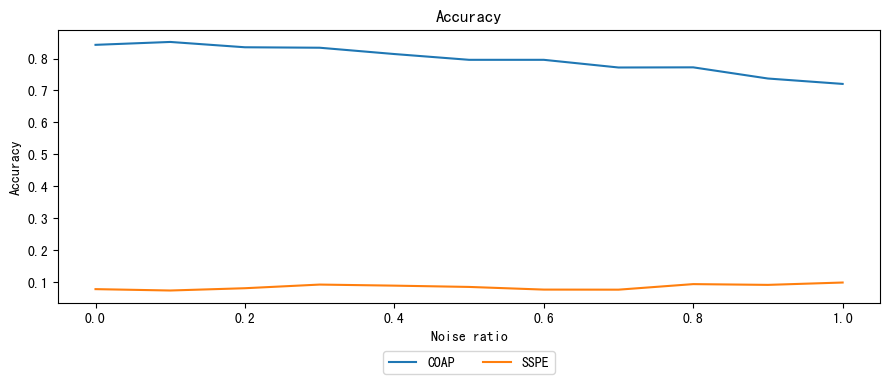

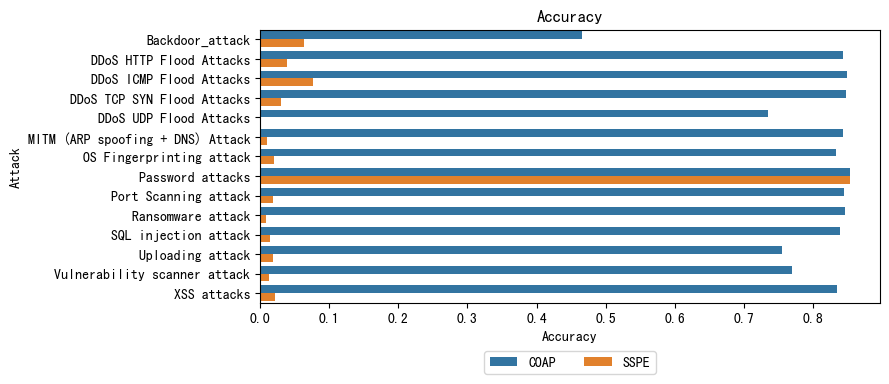

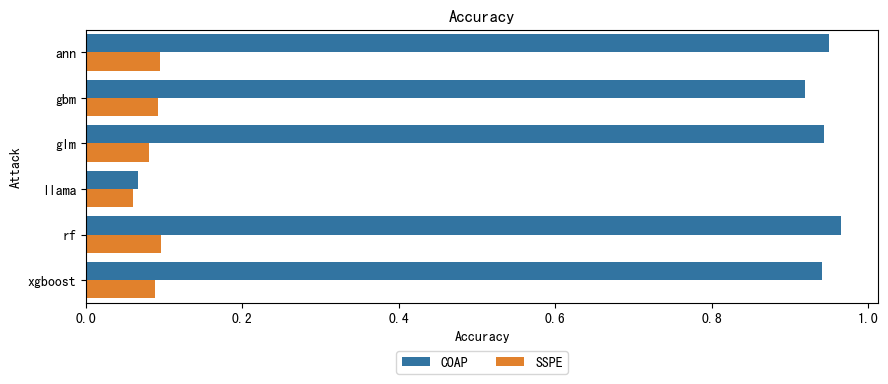

In [13]:
show_line(df_result)
df_tmp = df_result[['kind','ratio','attack','accuracy']].groupby(["kind",'attack']).mean().reset_index()
show_bar(df_tmp,'attack')
df_tmp = df_result[['kind','ratio','model','accuracy']].groupby(["kind",'model']).mean().reset_index()
show_bar(df_tmp,'model')

# Use various distance metrics to measure similarity.

In [ ]:
df_measure = pd.DataFrame()
for measure in ['Cosine','Pearson','Euclidean','EMD','Manhattan']:
    df_attack = CIoTAttack(df_score).get_attack(df_distance,measure)
    df_tmp = CIoTAttack(df_score).get_accuracy(df_attack)
    df_tmp['measure'] = measure
    df_measure = pd.concat([df_measure,df_tmp],ignore_index=True)
df_measure = df_measure.reset_index(drop=True) 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92400/92400 [00:36<00:00, 2544.22it/s]


In [ ]:
df_tmp = df_measure.copy(deep=True)
df_tmp['kind']=df_tmp['kind'].map({"score":"SSPE","sum":"COAP"})

show_line(df_tmp)
show_bar(df_tmp)

df_tmp[['measure','kind','accuracy']].groupby(['measure',"kind"]).mean()